# Instrucciones
Resuelve los ejercicios que viene a continuación utilizando los datos descritos en:
[https://corgis-edu.github.io/corgis/csv/broadway/](https://corgis-edu.github.io/corgis/csv/broadway/)


In [1]:
import csv
from collections import defaultdict
f=open("../../data/broadway.csv")
data=list(csv.reader(f))
categories=data[0]
data=data[1:]

categories

['Date.Day',
 'Date.Full',
 'Date.Month',
 'Date.Year',
 'Show.Name',
 'Show.Theatre',
 'Show.Type',
 'Statistics.Attendance',
 'Statistics.Capacity',
 'Statistics.Gross',
 'Statistics.Gross Potential',
 'Statistics.Performances']

1. Organiza tus datos

In [2]:
org_data = []
for d in data:
    dic = {}
    for k,v in zip(categories, d):
        dic[k]=v
    org_data.append(dic)


2. Crea una lista de todas las obras que aparecen y cuéntalas.

In [3]:
plays = {d["Show.Theatre"] for d in org_data}
list_plays = list(plays)
len(list_plays)

56

3. Cuenta el número de personas que atendieron cada obra a través de todos los años con ayuda de un diccionario

In [4]:
attendance_per_play = defaultdict(int)
for d in org_data:
    showName = d["Show.Name"]
    staticsAttendance = d["Statistics.Attendance"]
    attendance_per_play[showName] += int(staticsAttendance)
attendance_per_play


defaultdict(int,
            {'Tru': 5500,
             'Miss Saigon': 5843972,
             'A Streetcar Named Desire 92': 146568,
             'The Sisters Rosensweig': 510634,
             'Beauty And The Beast': 7609397,
             'A Little More Magic': 7896,
             'Broken Glass': 49960,
             'Show Boat': 1254392,
             'Sunset Boulevard': 1212286,
             'The Shadow Box': 27956,
             'Uncle Vanya': 17968,
             "Smokey Joe'S Cafe": 1904856,
             'Having Our Say': 155631,
             'Hamlet 95': 105388,
             'The Rose Tattoo': 40801,
             'A Month In The Country': 7481,
             'Arcadia': 82522,
             'Cats': 2290852,
             'Chronicle Of A Death Foretold': 4973,
             'How To Succeed In Business Without Really Trying': 80162,
             'Indiscretions': 6549,
             'Jackie Mason:  Politically Incorrect': 2343,
             'Kiss Of The Spider Woman': 4537,
             'Les Mi

4. Encuentra las 20 obras con más público

In [5]:
plays_attendance=[]
for key in attendance_per_play:
    plays_attendance.append((key, attendance_per_play[key]))
plays_attendance.sort(key=lambda x: x[1], reverse=True)
top_20_plays = plays_attendance[:20]
top_20_plays

[('The Lion King', 13207871),
 ('The Phantom Of The Opera', 11582362),
 ('Wicked', 9524462),
 ('Chicago', 8123328),
 ('Beauty And The Beast', 7609397),
 ('Mamma Mia!', 7566124),
 ('Miss Saigon', 5843972),
 ('Jersey Boys', 4971699),
 ('Rent', 4969873),
 ('Mary Poppins', 3878444),
 ('The Producers', 3672795),
 ('Les Miserables', 3466401),
 ('Hairspray', 3418653),
 ('Aida', 2714193),
 ('The Book Of Mormon', 2497551),
 ('Cats', 2290852),
 ("42Nd Street '01", 2199186),
 ("Monty Python'S Spamalot", 2075781),
 ('Spider-Man Turn Off The Dark', 2068468),
 ('Cabaret 98', 1919198)]

Genera las siguientes gráficas:
1. Para cada una de las 20 obras más populares, genera una gráfica que represente de la mejor manera los cambios en la cantidad de público año por año.

C:\Python38\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


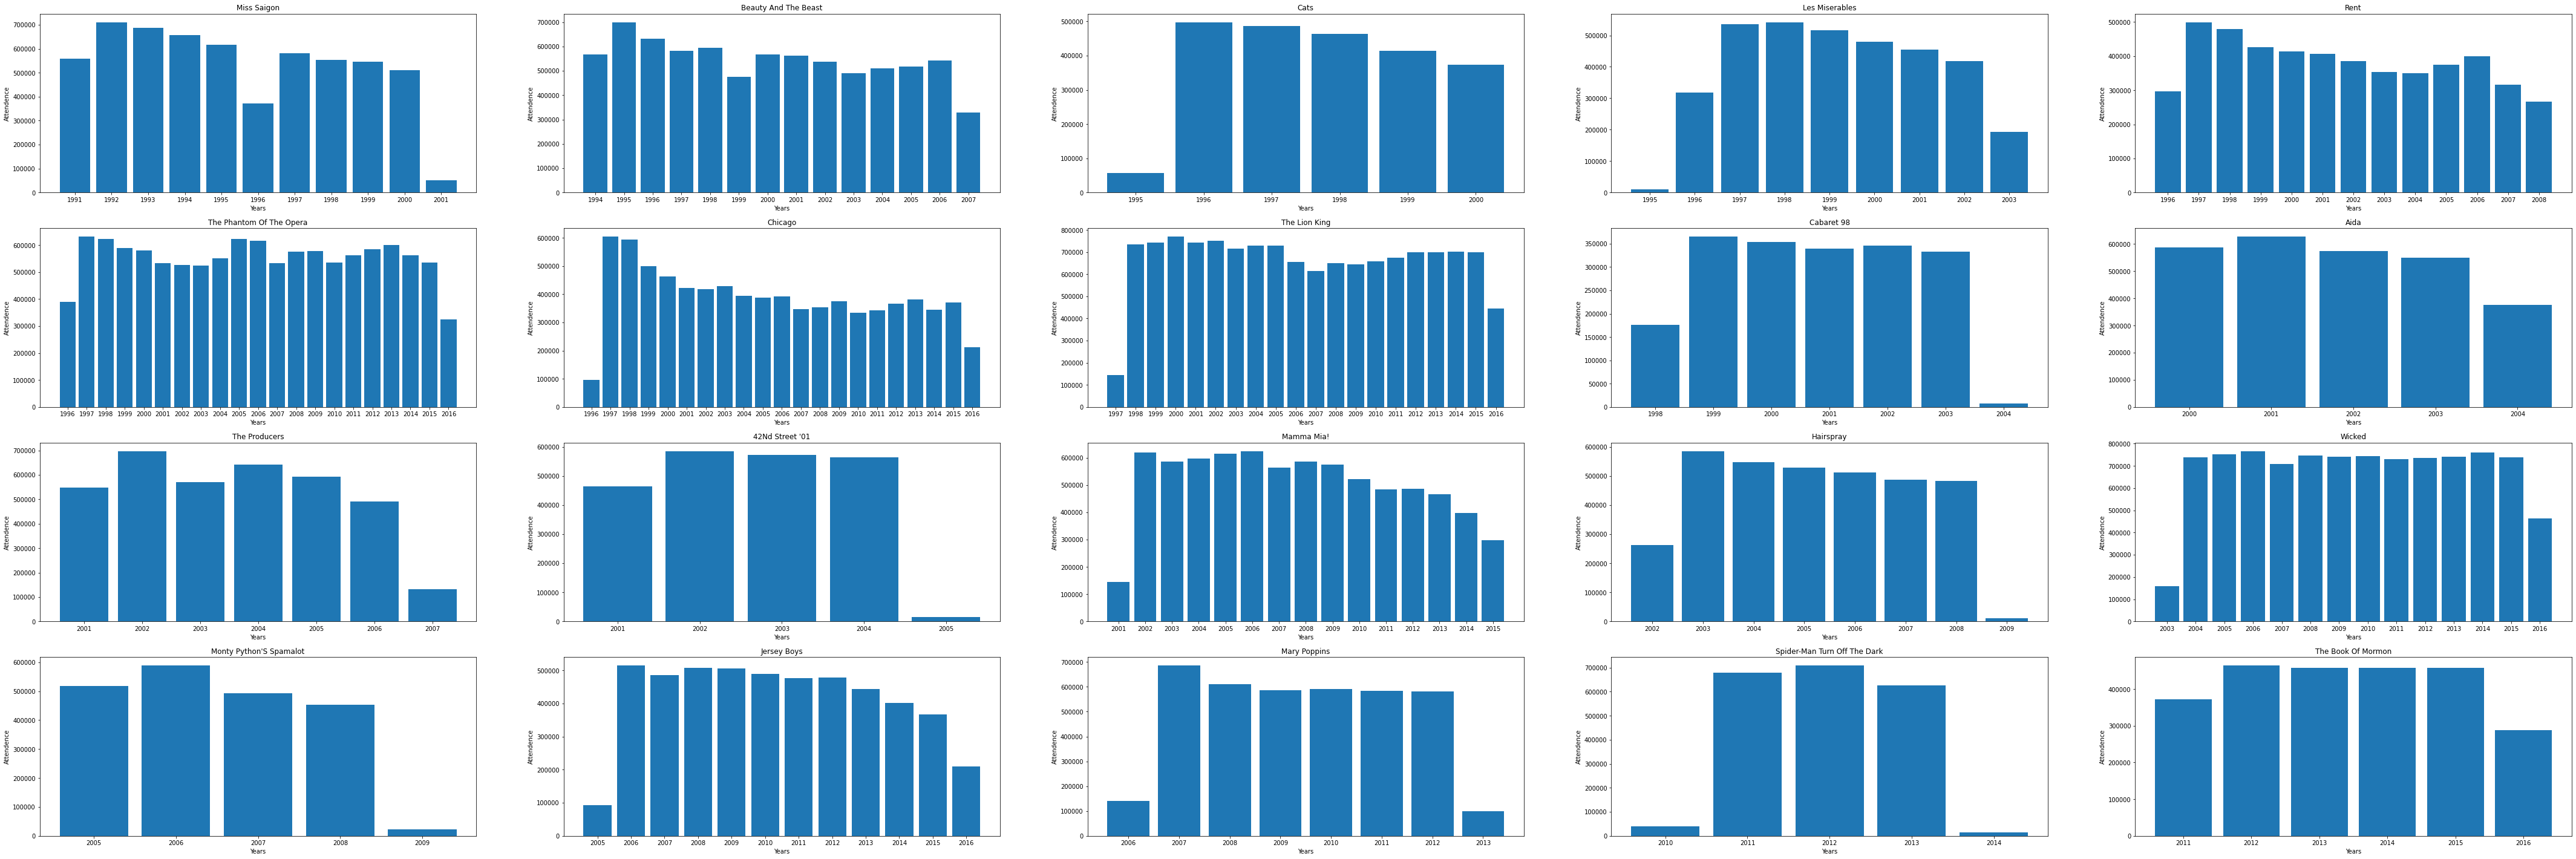

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

top_20_plays_names = [play[0] for play in top_20_plays]
top_20_plays_dict = defaultdict(dict)

for d in org_data:
    showName = d["Show.Name"]
    if showName in top_20_plays_names:
        staticsAttendance = int(d["Statistics.Attendance"])
        dateYear = d["Date.Year"]
        if top_20_plays_dict.get(showName) == None:
            top_20_plays_dict[showName]={}
            top_20_plays_dict[showName][dateYear] = staticsAttendance
        else:
            if top_20_plays_dict[showName].get(dateYear) == None:
                top_20_plays_dict[showName][dateYear] = staticsAttendance
            else:
                top_20_plays_dict[showName][dateYear] += staticsAttendance

t_subplots = 20
t_cols = 5
t_rows = t_subplots//t_cols
t_rows += t_subplots % t_cols

fig = plt.figure(constrained_layout=True, figsize=(75,25))
spec = gridspec.GridSpec(ncols=t_cols, nrows=t_rows)
counter_x = 0
counter_y = 0

for play in top_20_plays_dict:
    ax = fig.add_subplot(spec[counter_y, counter_x])
    counter_x += 1
    if counter_x > t_cols-1:
        counter_x = 0
        counter_y += 1
    years, attendence = zip(*top_20_plays_dict[play].items())
    width = 5
    n_years = len(years)
    x = np.linspace(0, n_years + (width*n_years), num=n_years, endpoint=False)

    ax.bar(x, attendence, width, tick_label=years)
    ax.set_title(play)
    ax.set_xlabel("Years")
    ax.set_ylabel("Attendence")
    fig.add_subplot(ax)

plt.show()


2. Para las 5 obras más populares, genera una gráfica que compare de la mejor manera la cantidad de público total entre ellas.

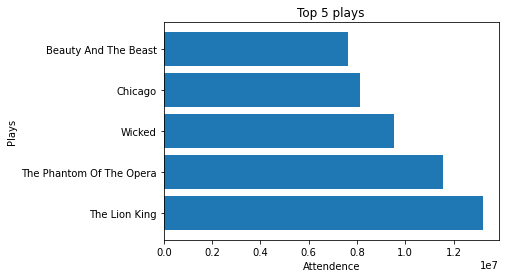

In [7]:
top_5_plays = plays_attendance[:5]
height = 5
n_plays = len(top_5_plays)
widths = []
names = []

for play in top_5_plays:
    name, attendence = play
    widths.append(attendence)
    names.append(name)

y = np.linspace(0, n_plays + (height*n_plays), num=n_plays, endpoint=False)

plt.barh(y, widths, height, tick_label=names, align="center")
plt.title("Top 5 plays")
plt.xlabel("Attendence")
plt.ylabel("Plays")
plt.show()


3. Para la obra de Mary Poppins, genera una gráfica en la que se pueda comparar la asistencia a la obra en los diferentes meses del año.

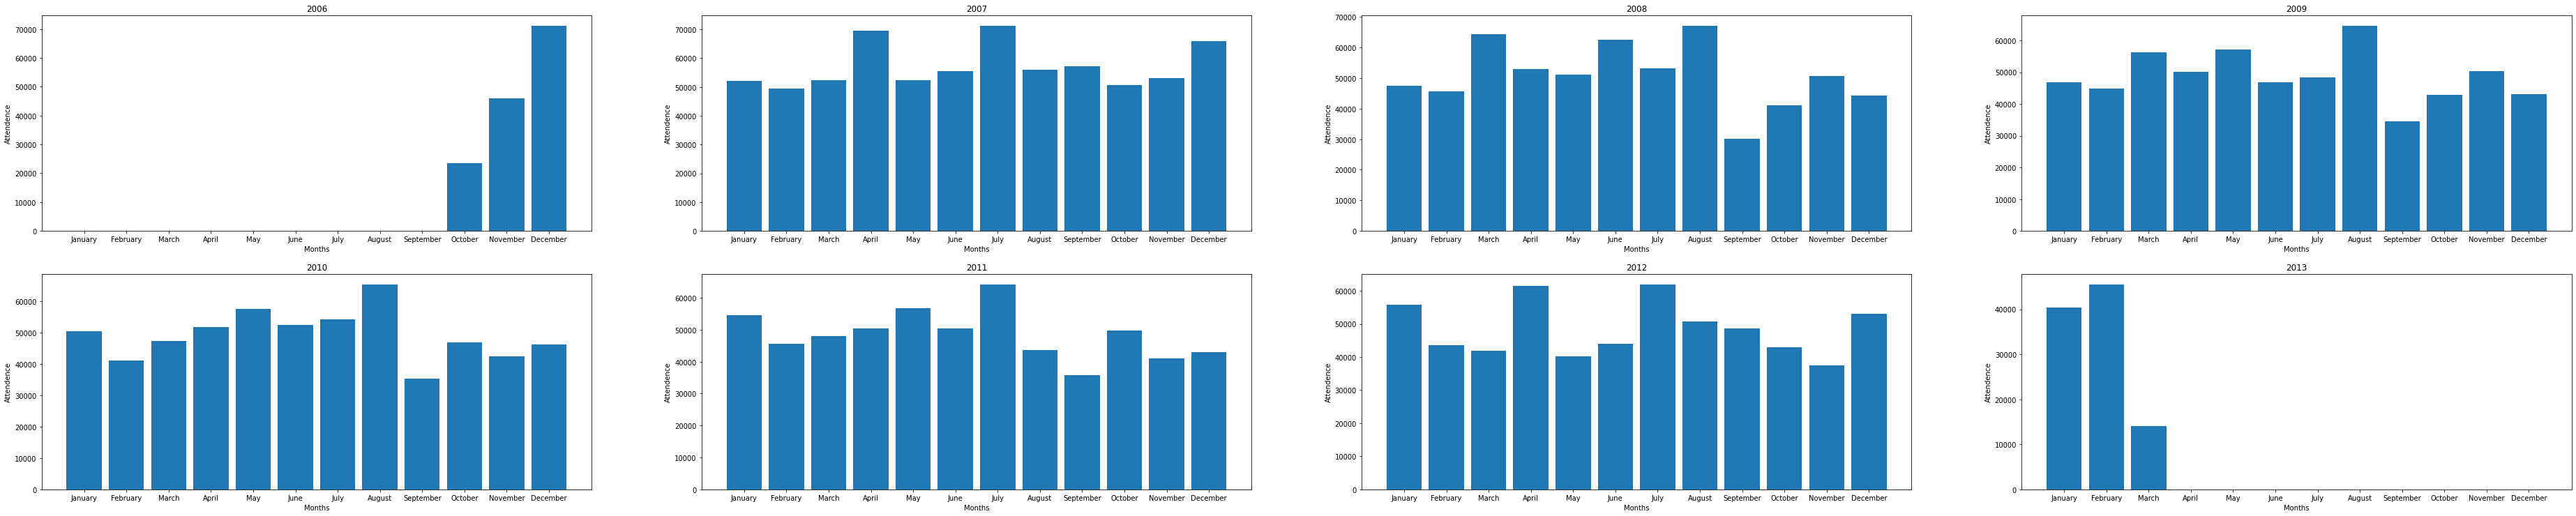

In [8]:
mary_popins_years = {}

for d in org_data:
    showName = d["Show.Name"]
    if showName == "Mary Poppins":
        dateYear = d["Date.Year"]
        dateMonth = d["Date.Month"]
        staticsAttendance = int(d["Statistics.Attendance"])
        if mary_popins_years.get(dateYear) == None:
            mary_popins_years[dateYear] = {}
            mary_popins_years[dateYear][dateMonth] = staticsAttendance
        else:
            if mary_popins_years[dateYear].get(dateMonth)==None:
                mary_popins_years[dateYear][dateMonth] = staticsAttendance
            else:
                mary_popins_years[dateYear][dateMonth] += staticsAttendance

t_subplots = len(mary_popins_years.items())
t_cols = 4
t_rows = t_subplots//t_cols
t_rows += t_subplots % t_cols

fig = plt.figure(constrained_layout=True, figsize=(65, 12.5))
spec = gridspec.GridSpec(ncols=t_cols, nrows=t_rows)
counter_x = 0
counter_y = 0

    
months_names = ["January","February","March","April","May","June","July","August","September","October","November","December"]

for year in mary_popins_years:
    ax = fig.add_subplot(spec[counter_y, counter_x])
    counter_x += 1

    if counter_x > t_cols-1:
        counter_x = 0
        counter_y += 1

    month_attendence = np.zeros(12)

    for month in mary_popins_years[year]:
        index = int(month)-1
        month_attendence[index] = mary_popins_years[year][month]

    width = 5
    n_months = len(month_attendence)
    x = np.linspace(0, n_months + (width*n_months), num=n_months, endpoint=False)

    ax.bar(x, month_attendence, width, tick_label=months_names)
    ax.set_title(year)
    ax.set_xlabel("Months")
    ax.set_ylabel("Attendence")
    fig.add_subplot(ax)
plt.show()
    


5. Genera una gráfica a tu elección que demuestre el comportamiento de alguna otra variable de los datos (tipo de show, teatros donde se presentan, etcétera)

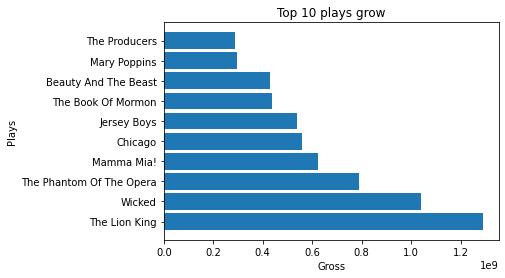

In [10]:
# Top 10 plays with greater total gross potential
total_gross_per_play = {}

for d in org_data:
    showName = d["Show.Name"]
    statisticsGross = int(d["Statistics.Gross"])
    if total_gross_per_play.get(showName) == None:
        total_gross_per_play[showName] = statisticsGross
    else:
        total_gross_per_play[showName] += statisticsGross

total_gross_list = []

for play in total_gross_per_play:
    total_gross_list.append((play, total_gross_per_play[play]))

total_gross_list.sort(key=lambda x: x[1], reverse=True)
top_10_gross_potential = total_gross_list[:10]
plays_name = []
statistics_gross = []

for play in top_10_gross_potential:
    name, gross = play
    plays_name.append(name)
    statistics_gross.append(gross)

n_plays = len(top_10_gross_potential)
height = 5

y = np.linspace(0, n_plays + (height*n_plays), num=n_plays, endpoint=False)

plt.barh(y, statistics_gross, height, tick_label=plays_name, align="center")
plt.title("Top 10 plays grow")
plt.xlabel("Gross")
plt.ylabel("Plays")
plt.show()


Extra: Para la obra de Cats, genera una gráfica en la que se aprecie de la mejor manera, una comparativa sobre la cantidad de semanas en que se lograron llenar el teatro a diferentes capacidades.